In [1]:
# NAME: VARSHA S
# REG NO: RA2011026010286

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,auc,roc_auc_score,accuracy_score,roc_curve
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [3]:
data=pd.read_excel('Assignment- Membership woes.xlsx')

In [4]:
#Exploratory Data Analysis &  Data pre-processing
#understanding the data
data.head()

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
0,A00001,29,113125.0,M,M,25200000.0,1.0,TYPE-B,45,2,ANNUAL,477,INFORCE,20060914,NaN
1,A00002,38,112220.0,M,M,10339200.0,1.0,TYPE-B,36,3,QUARTERLY,255,INFORCE,20061102,NaN
2,A00003,12,100000.0,M,M,14400000.0,1.0,TYPE-B,42,1,ANNUAL,7866,INFORCE,20070124,NaN
3,A00004,12,100000.0,M,M,9000000.0,1.0,TYPE-B,39,2,ANNUAL,200533,INFORCE,20070122,NaN
4,A00005,46,100000.0,M,M,4800000.0,1.0,TYPE-B,27,2,QUARTERLY,6988,INFORCE,20070131,NaN


In [5]:
data.tail()

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
10357,A10362,17,206180.15,NaN,M,NaN,6.0,TYPE-A,71,0,ANNUAL,1438477,INFORCE,20131129,NaN
10358,A10363,22,100000.42,NaN,F,399996.0,2.0,TYPE-A,63,0,ANNUAL,1288288,INFORCE,20131129,NaN
10359,A10364,17,270950.45,NaN,M,NaN,6.0,TYPE-A,62,3,ANNUAL,1244022,INFORCE,20131129,NaN
10360,A10365,57,210006.61,NaN,M,NaN,6.0,TYPE-A,72,2,ANNUAL,1436000,INFORCE,20131129,NaN
10361,A10366,17,100000.36,W,F,300000.0,1.0,TYPE-A,56,0,SEMI-ANNUAL,347999,INFORCE,20131129,NaN


In [6]:
data

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
0,A00001,29,113125.00,M,M,25200000.0,1.0,TYPE-B,45,2,ANNUAL,477,INFORCE,20060914,NaN
1,A00002,38,112220.00,M,M,10339200.0,1.0,TYPE-B,36,3,QUARTERLY,255,INFORCE,20061102,NaN
2,A00003,12,100000.00,M,M,14400000.0,1.0,TYPE-B,42,1,ANNUAL,7866,INFORCE,20070124,NaN
3,A00004,12,100000.00,M,M,9000000.0,1.0,TYPE-B,39,2,ANNUAL,200533,INFORCE,20070122,NaN
4,A00005,46,100000.00,M,M,4800000.0,1.0,TYPE-B,27,2,QUARTERLY,6988,INFORCE,20070131,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10357,A10362,17,206180.15,NaN,M,NaN,6.0,TYPE-A,71,0,ANNUAL,1438477,INFORCE,20131129,NaN
10358,A10363,22,100000.42,NaN,F,399996.0,2.0,TYPE-A,63,0,ANNUAL,1288288,INFORCE,20131129,NaN
10359,A10364,17,270950.45,NaN,M,NaN,6.0,TYPE-A,62,3,ANNUAL,1244022,INFORCE,20131129,NaN
10360,A10365,57,210006.61,NaN,M,NaN,6.0,TYPE-A,72,2,ANNUAL,1436000,INFORCE,20131129,NaN


In [7]:
data.shape

(10362, 15)

In [8]:
data.describe()

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
count,10362.000000,1.036200e+04,8.608000e+03,10319.000000,10362.000000,10362.000000,1.036200e+04,3.143000e+03
mean,29.395001,1.788122e+05,1.451100e+06,1.711019,46.798494,1.412276,2.010828e+07,2.011390e+07
std,22.427712,2.688747e+05,1.757174e+07,1.453960,13.897085,1.145136,1.719666e+04,1.378483e+04
min,9.000000,0.000000e+00,9.996000e+03,1.000000,0.000000,0.000000,2.006091e+07,2.007083e+07
25%,12.000000,1.000000e+05,3.999960e+05,1.000000,37.000000,0.000000,2.009123e+07,2.010122e+07
50%,19.000000,1.182093e+05,5.499960e+05,1.000000,46.000000,1.000000,2.010123e+07,2.011113e+07
75%,37.000000,1.900000e+05,9.999960e+05,2.000000,57.000000,2.000000,2.012123e+07,2.013012e+07
max,102.000000,1.010000e+07,1.000000e+09,6.000000,92.000000,3.000000,2.013113e+07,2.013112e+07


In [9]:
data.nunique()

MEMBERSHIP_NUMBER        10362
MEMBERSHIP_TERM_YEARS       92
ANNUAL_FEES               3168
MEMBER_MARITAL_STATUS        4
MEMBER_GENDER                2
MEMBER_ANNUAL_INCOME       798
MEMBER_OCCUPATION_CD         6
MEMBERSHIP_PACKAGE           2
MEMBER_AGE_AT_ISSUE         89
ADDITIONAL_MEMBERS           4
PAYMENT_MODE                 5
AGENT_CODE                4317
MEMBERSHIP_STATUS            2
START_DATE (YYYYMMDD)     1300
END_DATE  (YYYYMMDD)      1061
dtype: int64

In [10]:
data['MEMBERSHIP_STATUS'].unique()

array(['INFORCE', 'CANCELLED'], dtype=object)

In [11]:
#cleaning the data
data.isnull().sum()

MEMBERSHIP_NUMBER           0
MEMBERSHIP_TERM_YEARS       0
ANNUAL_FEES                 0
MEMBER_MARITAL_STATUS    2597
MEMBER_GENDER             611
MEMBER_ANNUAL_INCOME     1754
MEMBER_OCCUPATION_CD       43
MEMBERSHIP_PACKAGE          0
MEMBER_AGE_AT_ISSUE         0
ADDITIONAL_MEMBERS          0
PAYMENT_MODE                0
AGENT_CODE                  0
MEMBERSHIP_STATUS           0
START_DATE (YYYYMMDD)       0
END_DATE  (YYYYMMDD)     7219
dtype: int64

In [12]:
# Fill NA values
data.fillna(0, inplace=True) 

In [13]:
data

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
0,A00001,29,113125.00,M,M,25200000.0,1.0,TYPE-B,45,2,ANNUAL,477,INFORCE,20060914,0.0
1,A00002,38,112220.00,M,M,10339200.0,1.0,TYPE-B,36,3,QUARTERLY,255,INFORCE,20061102,0.0
2,A00003,12,100000.00,M,M,14400000.0,1.0,TYPE-B,42,1,ANNUAL,7866,INFORCE,20070124,0.0
3,A00004,12,100000.00,M,M,9000000.0,1.0,TYPE-B,39,2,ANNUAL,200533,INFORCE,20070122,0.0
4,A00005,46,100000.00,M,M,4800000.0,1.0,TYPE-B,27,2,QUARTERLY,6988,INFORCE,20070131,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10357,A10362,17,206180.15,0,M,0.0,6.0,TYPE-A,71,0,ANNUAL,1438477,INFORCE,20131129,0.0
10358,A10363,22,100000.42,0,F,399996.0,2.0,TYPE-A,63,0,ANNUAL,1288288,INFORCE,20131129,0.0
10359,A10364,17,270950.45,0,M,0.0,6.0,TYPE-A,62,3,ANNUAL,1244022,INFORCE,20131129,0.0
10360,A10365,57,210006.61,0,M,0.0,6.0,TYPE-A,72,2,ANNUAL,1436000,INFORCE,20131129,0.0


In [14]:
#Convert categorical columns to numeric codes
categorical_cols = ['MEMBER_MARITAL_STATUS', 'MEMBER_GENDER', 'MEMBERSHIP_PACKAGE', 'PAYMENT_MODE', 'MEMBERSHIP_STATUS']
for col in categorical_cols:
    data[col] = data[col].astype('category').cat.codes


In [15]:
data

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
0,A00001,29,113125.00,2,2,25200000.0,1.0,1,45,2,0,477,1,20060914,0.0
1,A00002,38,112220.00,2,2,10339200.0,1.0,1,36,3,2,255,1,20061102,0.0
2,A00003,12,100000.00,2,2,14400000.0,1.0,1,42,1,0,7866,1,20070124,0.0
3,A00004,12,100000.00,2,2,9000000.0,1.0,1,39,2,0,200533,1,20070122,0.0
4,A00005,46,100000.00,2,2,4800000.0,1.0,1,27,2,2,6988,1,20070131,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10357,A10362,17,206180.15,0,2,0.0,6.0,0,71,0,0,1438477,1,20131129,0.0
10358,A10363,22,100000.42,0,1,399996.0,2.0,0,63,0,0,1288288,1,20131129,0.0
10359,A10364,17,270950.45,0,2,0.0,6.0,0,62,3,0,1244022,1,20131129,0.0
10360,A10365,57,210006.61,0,2,0.0,6.0,0,72,2,0,1436000,1,20131129,0.0


In [16]:
data.isnull().sum()

MEMBERSHIP_NUMBER        0
MEMBERSHIP_TERM_YEARS    0
ANNUAL_FEES              0
MEMBER_MARITAL_STATUS    0
MEMBER_GENDER            0
MEMBER_ANNUAL_INCOME     0
MEMBER_OCCUPATION_CD     0
MEMBERSHIP_PACKAGE       0
MEMBER_AGE_AT_ISSUE      0
ADDITIONAL_MEMBERS       0
PAYMENT_MODE             0
AGENT_CODE               0
MEMBERSHIP_STATUS        0
START_DATE (YYYYMMDD)    0
END_DATE  (YYYYMMDD)     0
dtype: int64

In [17]:
# Ensure all columns are numeric now
numeric_data = data.select_dtypes(include=[np.number])

In [18]:
numeric_data.corr()

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
MEMBERSHIP_TERM_YEARS,1.000000,-0.003659,-0.271337,0.029333,0.023200,-0.003730,-0.345622,-0.017322,-0.215914,-0.042416,0.041998,0.073139,-0.041988
ANNUAL_FEES,-0.003659,1.000000,-0.019919,0.030559,0.051542,-0.025502,0.030947,0.021193,0.013278,-0.024119,-0.028820,0.051357,0.028867
MEMBER_MARITAL_STATUS,-0.271337,-0.019919,1.000000,0.250813,-0.016778,-0.161704,0.270876,-0.400773,0.150561,0.074771,-0.053454,-0.240811,0.053358
MEMBER_GENDER,0.029333,0.030559,0.250813,1.000000,0.031353,-0.014167,-0.106175,-0.119617,0.125232,0.010177,-0.020344,0.129687,0.020383
MEMBER_ANNUAL_INCOME,0.023200,0.051542,-0.016778,0.031353,1.000000,-0.020410,-0.013840,-0.049848,0.008992,0.017709,0.012831,0.015998,-0.012828
MEMBER_OCCUPATION_CD,-0.003730,-0.025502,-0.161704,-0.014167,-0.020410,1.000000,-0.146014,0.340988,-0.012809,-0.001741,0.065709,0.174820,-0.065665
MEMBERSHIP_PACKAGE,-0.345622,0.030947,0.270876,-0.106175,-0.013840,-0.146014,1.000000,-0.148601,0.114488,0.016506,-0.215254,-0.684388,0.215124
MEMBER_AGE_AT_ISSUE,-0.017322,0.021193,-0.400773,-0.119617,-0.049848,0.340988,-0.148601,1.000000,0.060035,-0.025094,0.091047,0.201518,-0.090971
ADDITIONAL_MEMBERS,-0.215914,0.013278,0.150561,0.125232,0.008992,-0.012809,0.114488,0.060035,1.000000,0.030673,0.018661,-0.066562,-0.018673
PAYMENT_MODE,-0.042416,-0.024119,0.074771,0.010177,0.017709,-0.001741,0.016506,-0.025094,0.030673,1.000000,-0.055162,-0.085776,0.055050


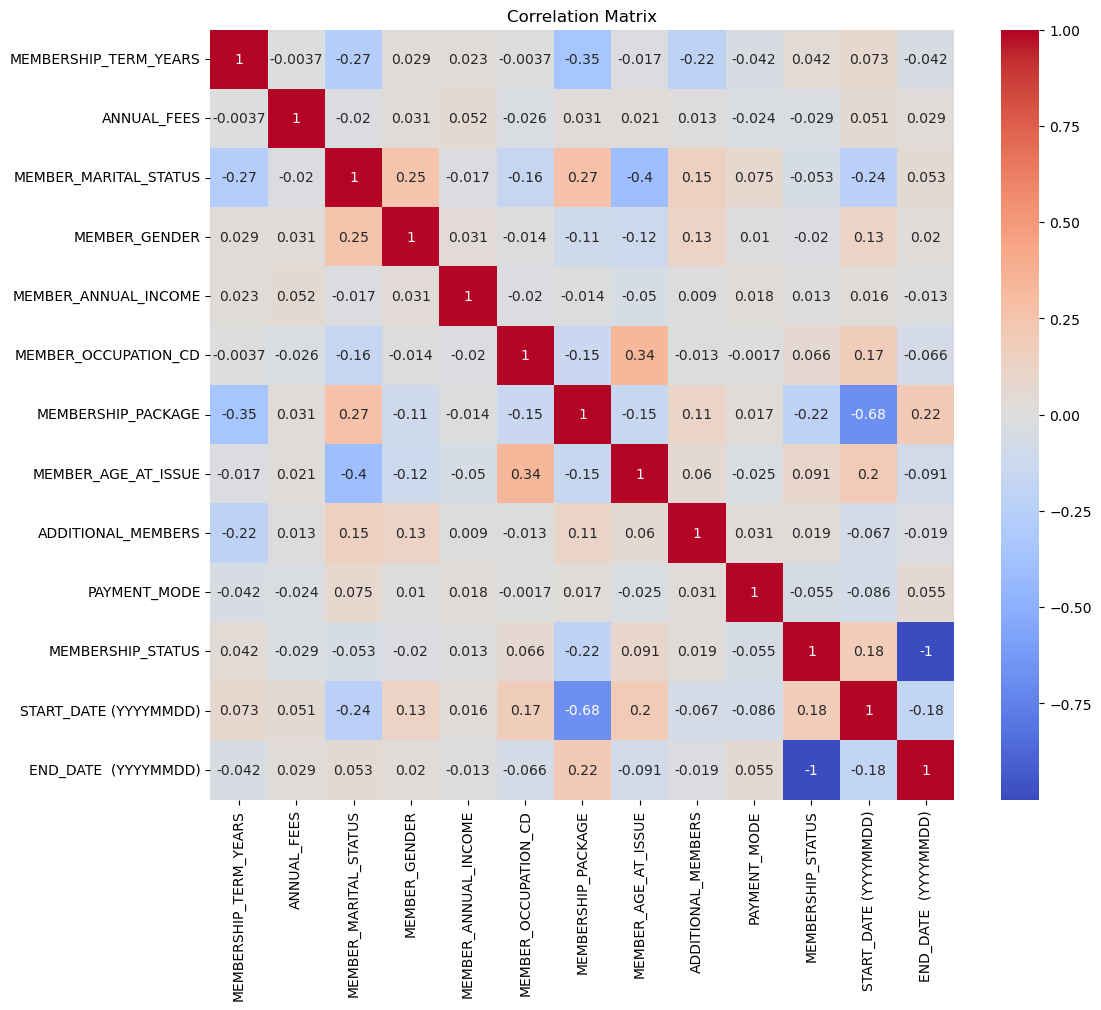

In [19]:
# EDA: Visualizing data distributions, relationships, etc.
plt.figure(figsize=(12,10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
# Data Splitting
# Splitting data into training and test sets
X = data.drop(['MEMBERSHIP_STATUS', 'MEMBERSHIP_NUMBER', 'AGENT_CODE', 'START_DATE (YYYYMMDD)', 'END_DATE  (YYYYMMDD)'], axis=1)
y = data['MEMBERSHIP_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [22]:
# Model Evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.70


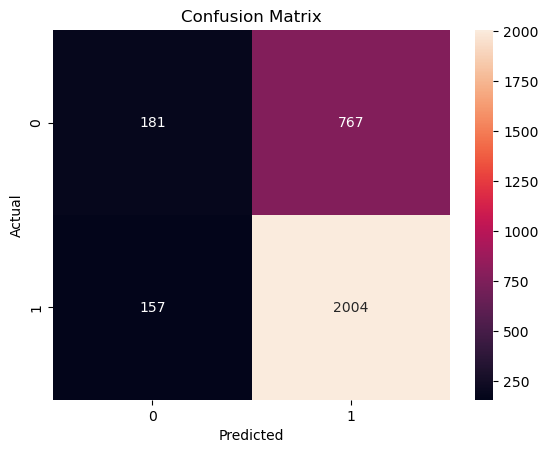

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


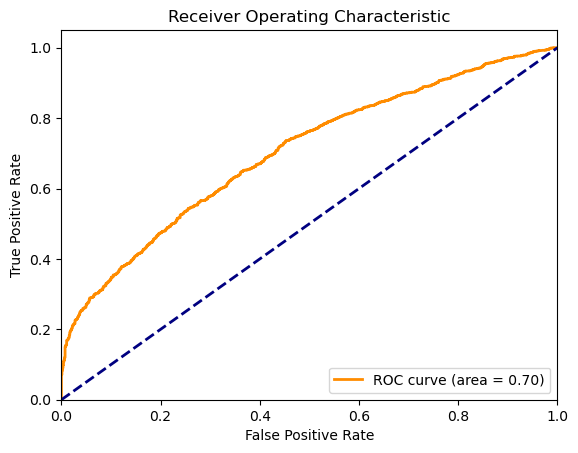

In [24]:
# AUC Curve
y_pred_proba = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [25]:
# SVC APPROACH
# Map 'CANCELLED' and 'INFORCE' to binary labels
label_encoder = LabelEncoder()
data['MEMBERSHIP_STATUS'] = label_encoder.fit_transform(data['MEMBERSHIP_STATUS'])
y = data['MEMBERSHIP_STATUS']

In [26]:
# Ensure all columns are numeric, handle categorical variables
X = pd.get_dummies(data.drop(['MEMBERSHIP_STATUS'], axis=1))

In [27]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Fit an SVM model
model = SVC(probability=True, random_state=42)
model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [29]:
# Score the model with the test data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


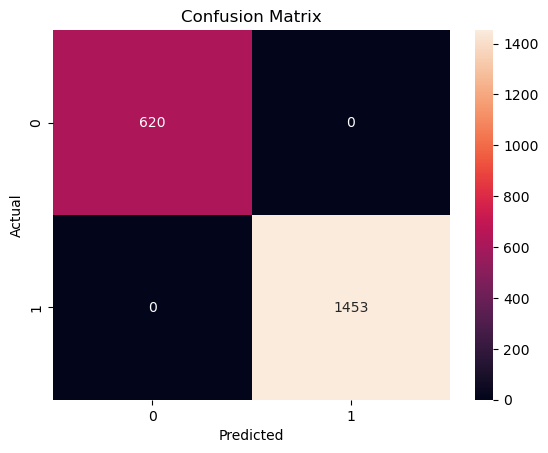

In [30]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [31]:
# AUC Curve
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

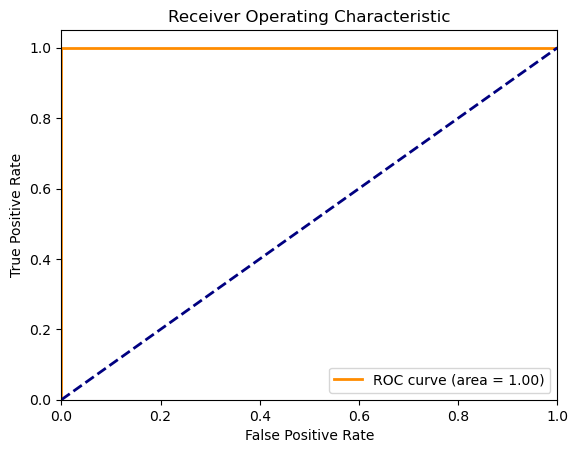

In [32]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

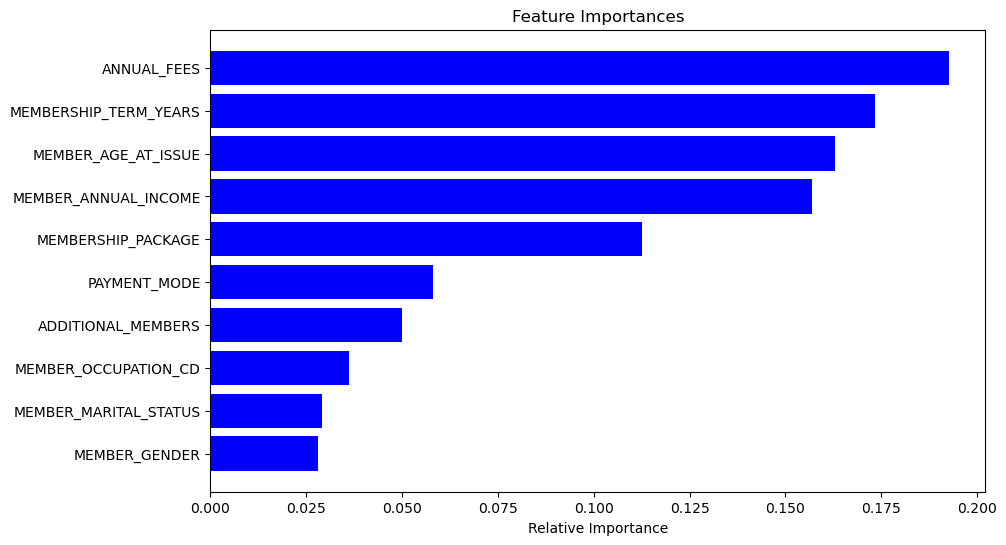

In [33]:
# Additional Insights (to be documented in the last cell of the notebook)
# Insights from EDA, feature importance, potential improvements, etc.
feature_importance = best_model.feature_importances_
features = X.columns
indices = np.argsort(feature_importance)

plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [ ]:
''' Based on the analysis of the above output graph, the main reasons for cancelation of membership are 
Annual fees
Membership term years
Member age at issue
This suggests that members are more likely to cancel their membership if they have to pay high annual fees, if they are locked into a long-term membership, or if they are older.

By implementing the graph for prediction, we can identify the members who are most likely to cancel their membership. This can help us to develop targeted strategies to retain these members and reduce churn.

To detect which members are likely to cancel their membership
Identify the features that are most important for predicting cancellation. This can be done by using a machine learning algorithm to train a model on a dataset of historical membership data. 
The features that are most important for predicting cancellation will be the ones that have the highest importance scores.

Develop a scoring system for each feature. This can be done by assigning a score to each feature based on its importance. For example, we could assign a higher score to the "Annual fees" feature than the "Member gender" feature, since the "Annual fees" feature is more important for predicting cancellation.
Calculate a total score for each member. This can be done by summing the scores for each feature.

Identify the members with the highest scores. These members are the ones who are most likely to cancel their membership.'''